# Assignment: Preparing Data for Analysis (Modified Titanic)

![](https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/%20files/hw.png)

In [2]:
#Import the libraries
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/hw/titanic_training_dataset_v2.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     865 non-null    float64
 2   Pclass       828 non-null    float64
 3   Name         866 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        858 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       852 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     803 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 83.7+ KB


# 1) Load data & review the data

<font color='blue'>Q1) What is the shape of this dataset? (rows & columns)</font>

In [6]:
df.shape## answer Q1| row-> 891, columns->12 


(891, 12)

# 2) Drop unqualified variables

*   Drop variables with missing > 50%
*   Drop categorical variables with flat values > 70% (variables with the same value in the same column)

<font color='blue'>Q2) How many columns do we have left?</font>




In [7]:
half=len(df)/2
print(half) # find half value of dataset

df = df.dropna(thresh=half,axis=1) # Drop any column with more than 50% missing values
print (df.shape)
df.head()


445.5
(891, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,S


In [8]:
for col in df.columns:
  print(df[col].value_counts()/df[col].notnull().count()) # print all value to check which one has flat value more than 70% or 0.7

1      0.001122
599    0.001122
588    0.001122
589    0.001122
590    0.001122
         ...   
301    0.001122
302    0.001122
303    0.001122
304    0.001122
891    0.001122
Name: PassengerId, Length: 891, dtype: float64
0.0    0.598204
1.0    0.372615
Name: Survived, dtype: float64
3.0    0.509540
1.0    0.226712
2.0    0.193042
Name: Pclass, dtype: float64
Braund, Mr. Owen Harris                                     0.001122
Karaic, Mr. Milan                                           0.001122
Van Impe, Mr. Jean Baptiste                                 0.001122
Leitch, Miss. Jessie Wills                                  0.001122
Johnson, Mr. Alfred                                         0.001122
                                                              ...   
Moraweck, Dr. Ernest                                        0.001122
Wick, Miss. Mary Natalie                                    0.001122
Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)    0.001122
Dennis, Mr. Samu

In [9]:
#Drop categorical variables with flat values > 70%
df=df.drop(['Parch'],axis= 1 ) # only Parch has flat value more than 70%
print(df.shape)
#df.head()

(891, 10)


In [10]:
print(' How many columns do we have left?---> ', df.shape[1])  ## answer Q2

 How many columns do we have left?--->  10


# 3) Remove all rows with missing target (the variable "Survived")

<font color='blue'>Q3) How many rows do we have left?</font>

In [11]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts)) #check null values
df.shape

Number of null values in each column:
PassengerId      0
Survived        26
Pclass          63
Name            25
Sex              0
Age            177
SibSp           33
Ticket          39
Fare             0
Embarked        88
dtype: int64


(891, 10)

In [12]:
df.dropna(subset=['Survived'],axis= 0, inplace= True) #drop missing value in Survived column
print(df.shape)


(865, 10)


In [13]:
print('How many rows do we have left?--->',df.shape[0]) ## answer Q3

How many rows do we have left?---> 865


# 4) Handle outliers 

For the variable “Fare”, replace outlier values with the boundary values


*   If value < (Q1 - 1.5IQR), relace with (Q1 - 1.5IQR)
*   If value > (Q3 + 1.5IQR), relace with (Q3 + 1.5IQR)

<font color='blue'>Q4) What is the mean of “Fare” after replacing the outliers (round 2 decimal points)?</font>



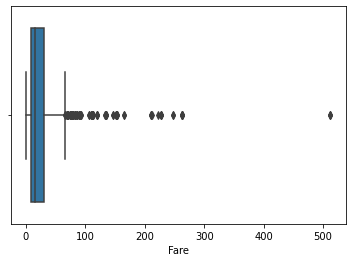

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.boxplot(x=df['Fare']) #plot box plot

In [15]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
median=df['Fare'].quantile(0.5)
IQR = Q3 - Q1
Q1_o=Q1-(1.5*IQR) # top boundary
Q3_o=Q3+(1.5*IQR)# bottom boundary
print(IQR)
print(Q1)
print(Q1_o)
print(Q3_o)
print(df['Fare'].mean())

23.1042
7.8958
-26.7605
65.6563
32.39239815028901


In [18]:

df['Fare'] = np.where(df['Fare'] > Q3_o, Q3_o, df['Fare']) #replace data outlier above Q3+(1.5*IQR)
df['Fare'] = np.where(df['Fare'] < Q1_o, Q1_o, df['Fare'])#replace data outlier below Q3-(1.5*IQR)
print('Mean of Fare-->',round(df['Fare'].mean(),2)) ## answer Q4


Mean of Fare--> 24.04


# 5) Impute missing value



*   Show the number of missing values in each variable
*   Impute missing values with mean & mode
*   Show the number of missing values again after missing value imputation

<font color='blue'>Q5) Which variable has the largest number of missing values?</font>



In [24]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))


Number of null values in each column:
PassengerId      0
Survived         0
Pclass          63
Name            25
Sex              0
Age            172
SibSp           33
Ticket          39
Fare             0
Embarked        87
dtype: int64


In [36]:
# Imputation of missing values for categories in pandas using 'mean'
df_mean = df.copy()


df_mean.fillna(df_mean.mean(), inplace=True)
null_counts_mean = df_mean.isnull().sum()
print("Number of null values in each column(mean):\n{}".format(null_counts_mean))#answer Q5.1 |using mean to fill missing value  -> variables with largest number of missing value is --> Embarked 87

Number of null values in each column(mean):
PassengerId     0
Survived        0
Pclass          0
Name           25
Sex             0
Age             0
SibSp           0
Ticket         39
Fare            0
Embarked       87
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [34]:
# Imputation of missing values for categories in pandas using 'mode'
df_mode = df.copy()


df_mode.fillna(df_mode.mode().iloc[0], inplace=True)
null_counts_mode = df_mode.isnull().sum()
print("Number of null values in each column(mode):\n{}".format(null_counts_mode))#answer Q5.2|  using mode to fill missing value  -> variables with largest number of missing value is --> none

Number of null values in each column(mode):
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# 6) Convert categorical to numeric values



*   Drop the variables “Name” & “Ticket”
*   For the variables “Sex” & “Embarked”, perform the dummy coding and drop the first level. Also, drop those original variables (“Sex” & “Embarked”)

<font color='blue'>Q6) How many columns do we have?</font>



In [37]:
df=df.drop(['Name','Ticket'],axis=1) #Drop the variables “Name” & “Ticket”

In [38]:
df.head() # result after drop

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0.0,3.0,male,22.0,1.0,7.2500,S
1,2,1.0,1.0,female,38.0,1.0,65.6563,C
2,3,1.0,3.0,female,26.0,0.0,7.9250,S
3,4,1.0,1.0,female,35.0,1.0,53.1000,S
4,5,0.0,3.0,male,35.0,0.0,8.0500,S


In [42]:
columns = ["Sex", "Embarked"]
dummy_df = pd.get_dummies(df[columns], drop_first=True) #perform dummy coding for “Sex” & “Embarked”
filtered_dummy_df = pd.concat([df, dummy_df], axis=1)
filtered_dummy_df = filtered_dummy_df.drop(columns, axis=1)


print('Columns after dummy coding--->',filtered_dummy_df.shape[1]) ##answer Q6

filtered_dummy_df.head()

Columns after dummy coding---> 9


,PassengerId,Survived,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3.0,22.0,1.0,7.2500,1,0,1
1,2,1.0,1.0,38.0,1.0,65.6563,0,0,0
2,3,1.0,3.0,26.0,0.0,7.9250,0,0,1
3,4,1.0,1.0,35.0,1.0,53.1000,0,0,1
4,5,0.0,3.0,35.0,0.0,8.0500,1,0,1


# 7) Partition data



*   Split train/test split with stratification using 70%:30% and random seed with 12345
*   Show a proportion between survived (1) and died (0) in all data sets (total data, train, test)

<font color='blue'>Q7) What is a proportion between survived (1) and died (0) in the training data?</font>



In [53]:
from sklearn.model_selection import train_test_split
y = filtered_dummy_df.pop('Survived')
X = filtered_dummy_df

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3, random_state=12345)

In [54]:
y.value_counts()/y.shape # proportion between survived (1) and died (0) in total data

0.0    0.616185
1.0    0.383815
Name: Survived, dtype: float64

In [55]:
y_test.value_counts()/y_test.shape[0] # proportion between survived (1) and died (0) in test data

0.0    0.615385
1.0    0.384615
Name: Survived, dtype: float64

In [56]:
y_train.value_counts()/y_train.shape[0] #answer Q7  | proportion between survived (1) and died (0) in train data

0.0    0.616529
1.0    0.383471
Name: Survived, dtype: float64